# Problem 2

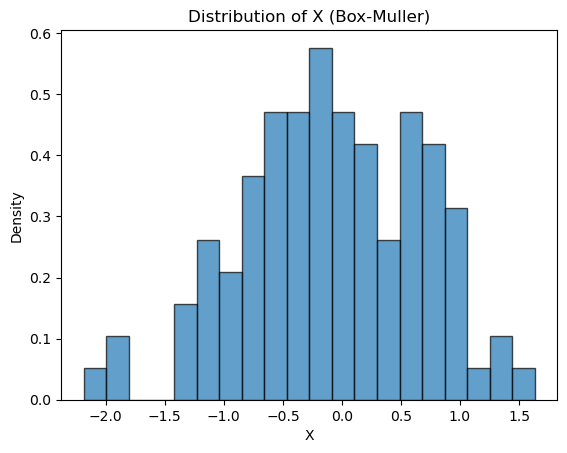

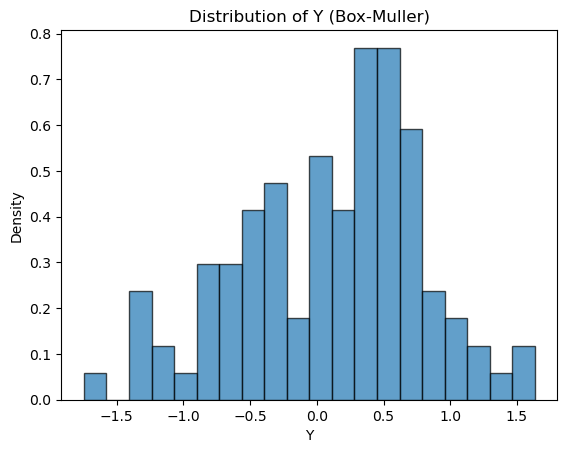

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def h(x, y):
    return np.exp(-x**2 - y**2 + x * np.sin(x * y))

def g(x, y):
    return (1 / (2 * np.pi)) * np.exp(-0.5 * (x**2 + y**2))

def box_muller():
    U1 = np.random.uniform(0, 1)
    U2 = np.random.uniform(0, 1)
    Z1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Z2 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)
    return Z1, Z2

def generate_samples(num_samples):
    samples = []
    C = 2 * np.pi

    while len(samples) < num_samples:
        X, Y = box_muller()
        
        U = np.random.uniform(0, 1)
        
        if U <= h(X, Y) / (C * g(X, Y)):
            samples.append((X, Y))
    
    return np.array(samples)

# Generate 100 pairs (X, Y)
num_samples = 100
samples = generate_samples(num_samples)

# Extract X and Y values
X_samples = samples[:, 0]
Y_samples = samples[:, 1]

# Plot the histogram of X samples
plt.hist(X_samples, bins=20, density=True, edgecolor='black', alpha=0.7)
plt.title('Distribution of X (Box-Muller)')
plt.xlabel('X')
plt.ylabel('Density')
plt.show()

# Plot the histogram of Y samples
plt.hist(Y_samples, bins=20, density=True, edgecolor='black', alpha=0.7)
plt.title('Distribution of Y (Box-Muller)')
plt.xlabel('Y')
plt.ylabel('Density')
plt.show()

# Problem 3

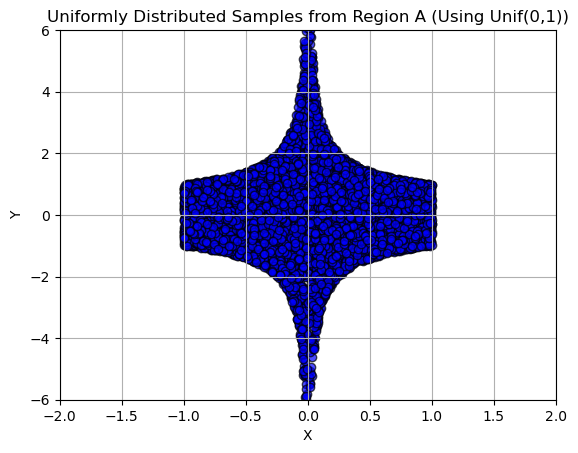

In [14]:
def sample_from_A(num_samples):
    samples = []
    
    for _ in range(num_samples):
        U1 = np.random.uniform(0, 1)
        X = -1 + 2 * U1
        
        if X == 0:
            Y = 0  # Avoid division by zero if X = 0...
        else:
            bound = np.abs(X)**(-1/2)
            U2 = np.random.uniform(0, 1)
            Y = -bound + 2 * bound * U2
        
        samples.append((X, Y))
    
    return np.array(samples)

# Generate 100 samples from the region A
num_samples = 10000
samples = sample_from_A(num_samples)

# Extract X and Y values for plotting
X_samples = samples[:, 0]
Y_samples = samples[:, 1]

# Plot the sampled (X, Y) pairs on a 2D plane
plt.scatter(X_samples, Y_samples, color='blue', alpha=0.7, edgecolor='black')
plt.title('Uniformly Distributed Samples from Region A (Using Unif(0,1))')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-6, 6)
plt.grid(True)
plt.show()

# Problem 4

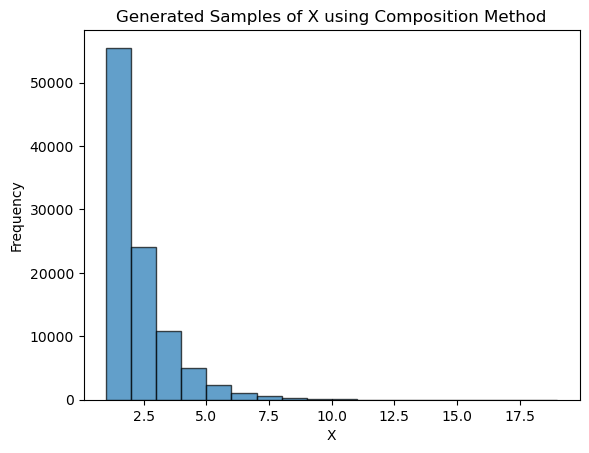

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_X(num_samples):
    samples = []
    
    for _ in range(num_samples):
        # Step 1: Generate a Bernoulli random variable with probability 1/2
        bernoulli = np.random.uniform(0, 1)
        
        if bernoulli <= 1/2:
            # Step 2: Use P_1 component (geometric-like distribution)
            X = 1
            while np.random.uniform(0, 1) > 0.5:
                X += 1
        elif 1/2 < bernoulli <= 3/4 :
            # Step 2: Use P_2 component (geometric-like distribution)
            X = 1
            while np.random.uniform(0, 1) > 2/3:
                X += 1
        
        samples.append(X)
    
    return np.array(samples)

# Generate 100 samples of X
num_samples = 100000
samples_X = generate_X(num_samples)

# Plot the distribution of the generated samples
plt.hist(samples_X, bins=range(1, max(samples_X)+2), edgecolor='k', alpha=0.7)
plt.title('Generated Samples of X using Composition Method')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()

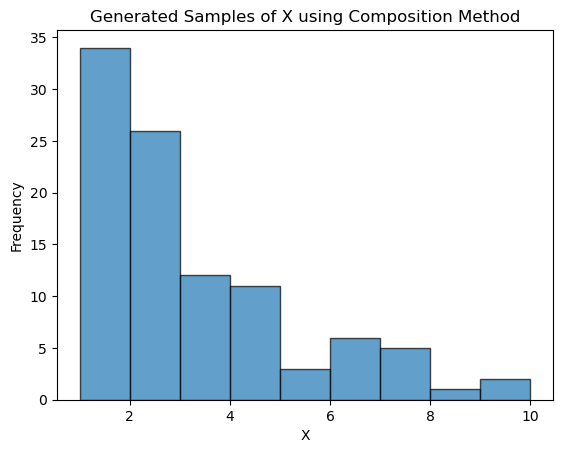

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate X using the composition method
def generate_X(num_samples):
    samples = []
    
    for _ in range(num_samples):
        # Step 1: Generate a Bernoulli random variable with probability 1/2
        bernoulli = np.random.uniform(0, 1)
        
        if bernoulli <= 0.5:
            # Step 2: Use P_1 component (geometric-like distribution with probability 1/2)
            X = 1
            while np.random.uniform(0, 1) > 0.5:
                X += 1
        else:
            # Step 2: Use P_2 component (with P(X=j) = 2^(j-1) / 3^j)
            U = np.random.uniform(0, 1)
            X = 1
            P = 1/3  # Initial probability for X = 1
            while U > P:
                X += 1
                P += (2 ** (X - 1)) / (3 ** X)
        
        samples.append(X)
    
    return np.array(samples)

# Generate 100 samples of Gib
num_samples = 100
samples_X = generate_X(num_samples)

# Plot the distribution of the generated samples
plt.hist(samples_X, bins=range(1, max(samples_X)+2), edgecolor='k', alpha=0.7)
plt.title('Generated Samples of X using Composition Method')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()

# Problem 5

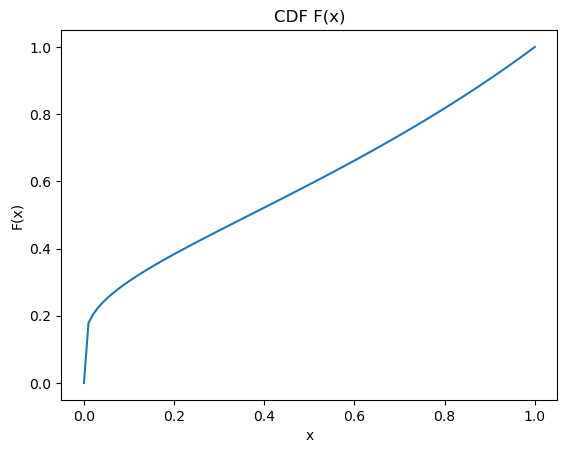

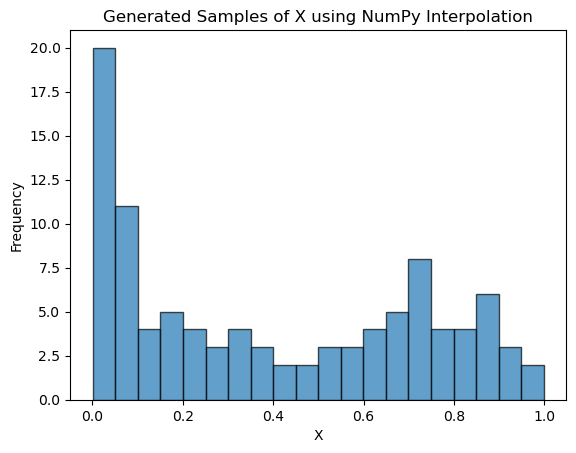

In [34]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

def F(x):
    result, _ = quad(lambda y: x**y * np.exp(-y), 0, np.inf)
    return result

# Precompute F(x) for a range of x values (0 to 1)
x_vals = np.linspace(0, 1, 100)
F_vals = np.array([F(x) for x in x_vals])

# Plot F(x) to visualize its shape
plt.plot(x_vals, F_vals)
plt.title('CDF F(x)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

# NumPy for linear interpolation of F(x)
def numpy_interpolate(F_vals, x_vals, U):
    return np.interp(U, F_vals, x_vals)

# Generate X using inverse transform sampling
def generate_X(num_samples):
    X_samples = []
    
    for _ in range(num_samples):
        # Generate U ~ Unif(0, 1)
        U = np.random.uniform(0, 1)
        
        # Find X using the interpolated CDF
        X = numpy_interpolate(F_vals, x_vals, U)
        X_samples.append(X)
    
    return np.array(X_samples)

# Generate 100 samples of X
num_samples = 100
samples_X = generate_X(num_samples)

# Plot the distribution of the generated samples
plt.hist(samples_X, bins=20, edgecolor='k', alpha=0.7)
plt.title('Generated Samples of X using NumPy Interpolation')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()